In [49]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [50]:
input_file = "out/results/rosmap959_minor.json"

with open(input_file, "r") as f:
    data = json.load(f)
    
ct_dfs = []
ct_abundances = {}

for celltype in data.keys():
    print(f"Processing cell type: {celltype}")
    abundances = data[celltype]["abundances"].copy()
    del data[celltype]["abundances"]
    
    df = pd.DataFrame(data[celltype]).T
    df["Major"] = True
    df["Celltype"] = celltype
    df["Fold"] = df.index
    ct_dfs.append(df)
    ct_abundances[celltype] = abundances
    
ct_df = pd.concat(ct_dfs, ignore_index=True)
ct_df

Processing cell type: Ast CHI3L1
Processing cell type: Ast DPP10
Processing cell type: Ast GRM3
Processing cell type: CAMs
Processing cell type: End
Processing cell type: Exc L3-4 RORB CUX2
Processing cell type: Exc L3-5 RORB PLCH1
Processing cell type: Exc L4-5 RORB GABRG1
Processing cell type: Exc L4-5 RORB IL1RAPL2
Processing cell type: Exc L5-6 RORB LINC02196
Processing cell type: Exc L6 THEMIS NFIA
Processing cell type: Exc L6b
Processing cell type: Excitatory_neurons_set1
Processing cell type: Exc L5/6 IT Car3
Processing cell type: Exc L5/6 NP
Processing cell type: Exc L5 ET
Processing cell type: Exc L6 CT
Processing cell type: Exc NRGN
Processing cell type: Exc RELN CHD7
Processing cell type: Fib FLRT2
Processing cell type: Fib SLC4A4
Processing cell type: Inh ALCAM TRPM3
Processing cell type: Inh CUX2 MSR1
Processing cell type: Inh ENOX2 SPHKAP
Processing cell type: Inh FBN2 EPB41L4A
Processing cell type: Inh GPC5 RIT2
Processing cell type: Inh L1-2 PAX6 SCGN
Processing cell ty

,accuracy,precision,recall,f1,roc_auc,Major,Celltype,Fold
0,0.576923,0.571429,0.857143,0.685714,0.797619,True,Ast CHI3L1,0
1,0.730769,0.769231,0.714286,0.740741,0.767857,True,Ast CHI3L1,1
2,0.692308,0.687500,0.785714,0.733333,0.625000,True,Ast CHI3L1,2
3,0.692308,0.687500,0.785714,0.733333,0.809524,True,Ast CHI3L1,3
4,0.720000,0.705882,0.857143,0.774194,0.824675,True,Ast CHI3L1,4
...,...,...,...,...,...,...,...,...
265,0.560000,0.562500,0.692308,0.620690,0.442308,True,T cells,0
266,0.520000,0.550000,0.785714,0.647059,0.597403,True,T cells,1
267,0.480000,0.538462,0.500000,0.518519,0.506494,True,T cells,2
268,0.640000,0.727273,0.571429,0.640000,0.655844,True,T cells,3


C:\Users\timov\AppData\Local\Temp\ipykernel_49096\779120735.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\timov\AppData\Local\Temp\ipykernel_49096\779120735.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\timov\AppData\Local\Temp\ipykernel_49096\779120735.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\timov\AppData\Local\Temp\ipykernel_49096\779120735.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xti

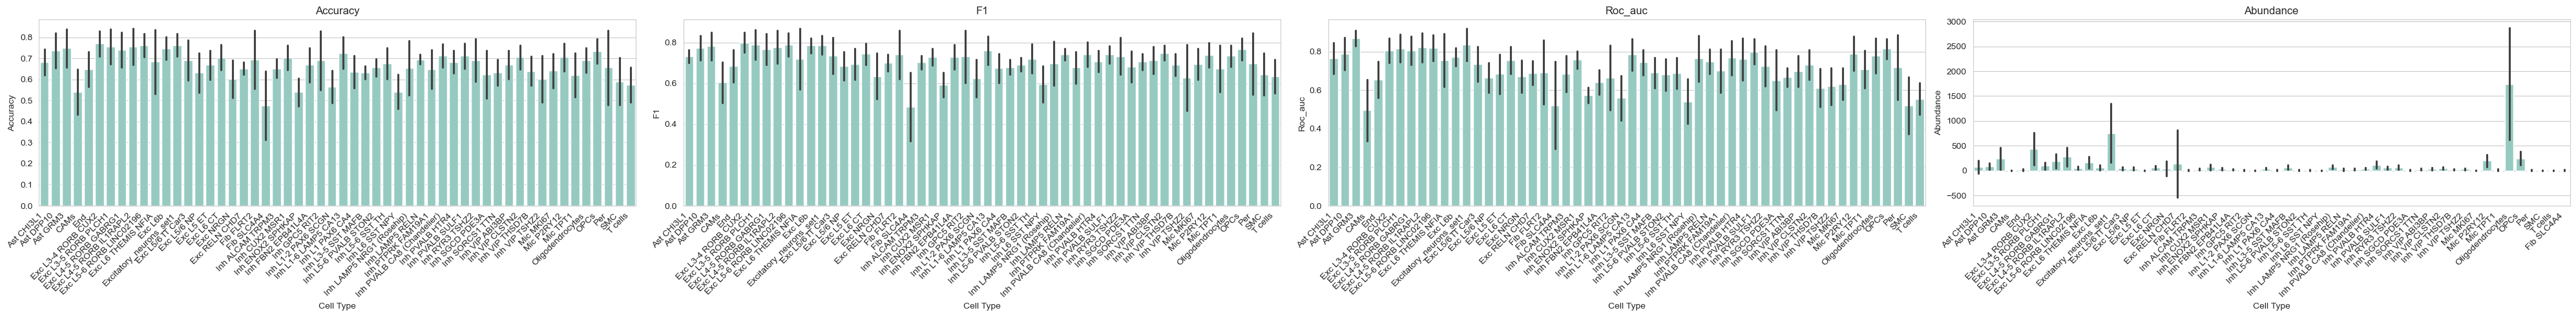

In [52]:
# barplot, with a bar per cell type. separate plots for major / minor
# four panels, for acc, f1, auroc, and abundance
# for the scores, average across folds and show standard deviation as error bar. 
# for the abundance, show the mean and standard deviation across the values in the abundances.

fig, axs = plt.subplots(1, 4, figsize=(40, 5))

for i, metric in enumerate(["accuracy", "f1", "roc_auc"]):
    ax = axs[i]
    
    sns.barplot(data=ct_df, x="Celltype", y=metric, ax=ax, errorbar="sd")
    ax.set_title(metric.capitalize())
    ax.set_xlabel("Cell Type")
    ax.set_ylabel(metric.capitalize())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    
# abundance
abundance_df = pd.DataFrame.from_dict(ct_abundances, orient="index").reset_index()
abundance_df.columns = ["Celltype"] + list(abundance_df.columns[1:])
abundance_df = abundance_df.melt(id_vars=["Celltype"], var_name="Fold", value_name="Abundance")

sns.barplot(data=abundance_df, x="Celltype", y="Abundance", ax=axs[3], errorbar="sd")
axs[3].set_title("Abundance")
axs[3].set_xlabel("Cell Type")
axs[3].set_ylabel("Abundance")
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()


plt.show()